In [88]:
#import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
#load data
training_set = pd.read_csv('training_set_values.csv')
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [3]:
training_set.sample(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
12140,42312,0.0,2013-03-06,Government Of Tanzania,1399,Government,34.689976,-2.150565,Nyangi Sirocha,4,...,never pay,salty,salty,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
50943,2126,0.0,2011-08-01,Bs,0,KA,31.602342,-1.620389,Kamutenge,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,improved spring,improved spring
19848,20724,0.0,2012-10-20,World Vision,0,DWE,32.904899,-4.179093,Kwa Bubu,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
31408,56045,0.0,2011-07-11,Hesawa,0,HESAWA,30.658465,-2.523827,Gwasa,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
22102,63815,0.0,2012-10-15,Dwssp,0,DWE,33.589376,-3.715731,Joshoni,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe


In [4]:
training_set.shape

(59400, 40)

In [5]:
labels = pd.read_csv('training_set_labels.csv')
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [6]:
#join training set and the training set labels
training_set_data = labels.merge(training_set, on = 'id')
training_set_data.sample(5)

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
29365,17663,functional,0.0,2012-10-12,World Bank,0,PET,33.404359,-4.238981,Zahanati,...,per bucket,salty,salty,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
23377,50528,functional,0.0,2011-03-16,Chamavita,1932,Chamavita,38.261857,-4.636435,Kwa Mzee Bakari Hihano,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
10530,64387,non functional,0.0,2013-02-20,Songea District Council,989,DWE,35.516142,-10.735972,Shule Ya Sekondari L,...,on failure,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump
31772,53961,functional,0.0,2011-08-02,Private Individual,0,not known,32.441142,-2.321805,Kwa Kanyola,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
52632,56746,functional,0.0,2012-10-04,Netherlands,0,DWE,34.045639,-3.218921,Mkwajuni,...,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [7]:
(training_set_data.isna().sum() / len(training_set_data) * 100).sort_values(ascending=False)


scheme_name              47.417508
scheme_management         6.526936
installer                 6.153199
funder                    6.119529
public_meeting            5.612795
permit                    5.144781
subvillage                0.624579
basin                     0.000000
lga                       0.000000
district_code             0.000000
region_code               0.000000
region                    0.000000
waterpoint_type_group     0.000000
ward                      0.000000
wpt_name                  0.000000
latitude                  0.000000
longitude                 0.000000
gps_height                0.000000
date_recorded             0.000000
amount_tsh                0.000000
status_group              0.000000
num_private               0.000000
recorded_by               0.000000
population                0.000000
waterpoint_type           0.000000
source_class              0.000000
source_type               0.000000
source                    0.000000
quantity_group      

### EDA AND DATA CLEANING

In [8]:
#  In this particular analysis the scheme_name and scheme_management is not important so we will drop it

training_set_data.drop(columns=[ 'scheme_name' , 'scheme_management'], inplace= True)
# replace the 1 non value in scheme managment column with 'other'

In [9]:
# Close look at the public_meeting column

missing_values = training_set_data['public_meeting'].isna().sum()
unique_values = training_set_data['public_meeting'].value_counts()
missing_values, unique_values

(3334,
 True     51011
 False     5055
 Name: public_meeting, dtype: int64)

In [10]:
#Because the public meeting column might be important, we will replace the nun values with an 'other' placeholder

training_set_data['public_meeting'].fillna('other' , inplace = True)
null = training_set_data['public_meeting'].isna().sum() 
counts = training_set_data.public_meeting.value_counts()

null, counts

(0,
 True     51011
 False     5055
 other     3334
 Name: public_meeting, dtype: int64)

In [11]:
# lets take a closer look at the installer feature
training_set_data['installer'] = training_set_data['installer'].str.strip()
null_values = training_set_data.installer.isna().sum()
count = training_set_data.installer.value_counts()
nun = (training_set_data['installer'] == 0).any()
null_values , nun , count 

(3655,
 False,
 DWE                   17402
 Government             1825
 RWE                    1206
 Commu                  1060
 DANIDA                 1050
                       ...  
 SELEPTA                   1
 Fin Water                 1
 kanisa                    1
 Rural water Supply        1
 TANCRO                    1
 Name: installer, Length: 2145, dtype: int64)

In [12]:
# give the installer null values an "other" place holder

training_set_data['installer'].fillna('other' , inplace = True)
nun = training_set_data['installer'].isna().sum()
counts = training_set_data['installer'].value_counts()
counts , nun 

(DWE             17402
 other            3655
 Government       1825
 RWE              1206
 Commu            1060
                 ...  
 H4CCP               1
 Kambi Migoko        1
 Safari Roya         1
 Villag              1
 TANCRO              1
 Name: installer, Length: 2146, dtype: int64,
 0)

In [13]:
#lets have a closer look at the funder column
training_set_data['funder'].str.strip()
funder_count = training_set_data['funder'].value_counts()
funder_missing = training_set_data['funder'].isna().sum()
funder_nun = (training_set_data['funder'] == 0).any()
funder_missing,funder_count,funder_nun


(3635,
 Government Of Tanzania    9084
 Danida                    3114
 Hesawa                    2202
 Rwssp                     1374
 World Bank                1349
                           ... 
 Gg                           1
 Pancrasi                     1
 Makanga                      1
 Rarymond Ekura               1
 John Skwese                  1
 Name: funder, Length: 1897, dtype: int64,
 False)

In [14]:
# fill the null values with the 'other' place holder. the assumption is that the projects could have been funded
# by organizations that have not been documented
training_set_data['funder'].fillna('other' , inplace = True)
training_set_data['funder'].isna().any()


False

In [15]:
# closer look at the permit column
count = training_set_data['permit'].value_counts()
null = training_set_data['permit'].isna().sum()
null , count


(3056,
 True     38852
 False    17492
 Name: permit, dtype: int64)

In [16]:
# filling the null permit values with unknown. Our assumption is the null values could be either true or false

training_set_data['permit'].fillna('unknown', inplace = True)
training_set_data['permit'].isna().any()

False

In [17]:
# closer look at the sub_village column

training_set_data['subvillage'].str.strip()

subvillage_count = training_set_data.subvillage.value_counts()
subvillage_nan = (training_set_data.subvillage == 'nan').any()
subvillage_null= training_set_data['subvillage'].isna().sum()

subvillage_nan, subvillage_null, subvillage_count


(False,
 371,
 Madukani         508
 Shuleni          506
 Majengo          502
 Kati             373
 Mtakuja          262
                 ... 
 Matene             1
 Olumkuna           1
 Nangara            1
 Kwa Nyanji         1
 Mabama Center      1
 Name: subvillage, Length: 19287, dtype: int64)

In [18]:
training_set_data['subvillage'].fillna('unknown' , inplace = True)
training_set_data['subvillage'].isna().any()

False

In [19]:
(training_set_data.isna().sum() / len(training_set_data) * 100).sort_values(ascending=False)


waterpoint_type_group    0.0
wpt_name                 0.0
lga                      0.0
district_code            0.0
region_code              0.0
region                   0.0
subvillage               0.0
basin                    0.0
num_private              0.0
latitude                 0.0
population               0.0
longitude                0.0
installer                0.0
gps_height               0.0
funder                   0.0
date_recorded            0.0
amount_tsh               0.0
status_group             0.0
ward                     0.0
public_meeting           0.0
waterpoint_type          0.0
payment_type             0.0
source_class             0.0
source_type              0.0
source                   0.0
quantity_group           0.0
quantity                 0.0
quality_group            0.0
water_quality            0.0
payment                  0.0
recorded_by              0.0
management_group         0.0
management               0.0
extraction_type_class    0.0
extraction_typ

In [20]:
# distribution of status group on year of construction
from pandasql import sqldf
# Query
query = """SELECT construction_year, status_group, COUNT(*) as count
            FROM training_set_data
            GROUP BY construction_year, status_group
            ORDER BY count DESC
            LIMIT 10 """

pysqldf = sqldf(query)

# Run the query
result = pysqldf
result

# """Construction year has a lot of 0 values. We will drop the construction year feature as its not important in our analysis"""


,construction_year,status_group,count
0,0,functional,10555
1,0,non functional,8365
2,2010,functional,2023
3,2008,functional,1839
4,0,functional needs repair,1789
5,2009,functional,1774
6,2000,functional,1279
7,2007,functional,1081
8,2011,functional,943
9,2006,functional,883


In [21]:
# drop construction year column
training_set_data.drop('construction_year' , axis = 1,  inplace= True) 

In [22]:
# which other columns have 0 as a row entry
columns_with_zero_entries = []

for column in training_set_data.columns:
    if (training_set_data[column] == 0).any():
        columns_with_zero_entries.append(column)

print(columns_with_zero_entries)


['id', 'amount_tsh', 'gps_height', 'longitude', 'num_private', 'district_code', 'population', 'public_meeting', 'permit']


In [23]:
# """Amount_tsh refers to the total static head which is  the height that water has to travel as it moves through your discharge pipe.
#  Having a static head of 0 is normal"""

training_set_data['amount_tsh'].value_counts(normalize=True)

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
8500.0      0.000017
6300.0      0.000017
220.0       0.000017
138000.0    0.000017
12.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

In [24]:
# """Gps_height refers to the altitude of the well. Having a gps height of 0 could mean that the well
#  is located at or very close to the sea level.
#  This could be determined by the well loction and topography"""

training_set_data['gps_height'].value_counts(normalize = True)

 0       0.344074
-15      0.001010
-16      0.000926
-13      0.000926
-20      0.000875
           ...   
 2285    0.000017
 2424    0.000017
 2552    0.000017
 2413    0.000017
 2385    0.000017
Name: gps_height, Length: 2428, dtype: float64

In [25]:
training_set_data['longitude'].value_counts()

# A longitude of 0.0000 is not viable in tanzania due to its geographical location

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

In [26]:
#check if there is a latitude of -0
latitude_zero = training_set_data[training_set_data['latitude'] == -0.000]

latitude_0 = training_set_data[training_set_data['latitude'] == -0.00 ]
if not latitude_zero.empty:
    print("There are latitude values equal to -0.000 in the data.")
else:
    print("There are no latitude values equal to -0.000 in the data.")

# fill the 

There are no latitude values equal to -0.000 in the data.


In [27]:
training_set_data.subvillage.value_counts().sort_values(ascending= True)

Mabama Center      1
Malesela           1
Amani Gomvu        1
Kiponza            1
Nyalioba           1
                ... 
unknown          371
Kati             373
Majengo          502
Shuleni          506
Madukani         508
Name: subvillage, Length: 19288, dtype: int64

In [28]:
# replace the longitude 0.0000 with the mean longitude of of the subvillage feature because its geographically coded
 # and it has the most area information distribution
def impute_subvillage(group):

    mean_longitude = group['longitude'].mean()
    group['longitude'].replace(0.000000, mean_longitude, inplace=True)
    
    return group

# Apply the impute_subvillage function within the groupby
training_set_data = training_set_data.groupby('subvillage').apply(impute_subvillage).reset_index(drop=True)

#assert replacement
training_set_data['longitude'].value_counts()


0.000000     1142
30.655523      73
26.970854      20
5.186375       15
20.643729      15
             ... 
38.206421       1
33.848109       1
38.477746       1
32.108284       1
36.835439       1
Name: longitude, Length: 57747, dtype: int64

In [29]:
training_set_data.ward.value_counts()

Igosi               307
Imalinyi            252
Siha Kati           232
Mdandu              231
Nduruma             217
                   ... 
Mitole                1
Mwanga Kaskazini      1
Kirongo               1
Korongoni             1
Uchindile             1
Name: ward, Length: 2092, dtype: int64

In [30]:
# using subvillage did not fill all the null values. Make use of the ward feature to fill the remaining values

def impute_ward(group):

    mean_longitude = group['longitude'].mean()
    group['longitude'].replace(0.0000, mean_longitude, inplace=True)
    
    return group

# Apply the impute_subvillage function within the groupby
training_set_data = training_set_data.groupby('ward').apply(impute_subvillage).reset_index(drop=True)

# Display the updated value_counts
training_set_data['longitude'].value_counts()

3.523766     93
30.655523    73
5.906816     58
7.931782     48
19.391759    47
             ..
30.917959     1
35.476144     1
37.140763     1
36.831815     1
36.835439     1
Name: longitude, Length: 57809, dtype: int64

In [31]:
#assert replacement
(training_set_data.longitude == 0.0000).value_counts()

#there are still 32 entries with 0.000 as the  longitude

False    59368
True        32
Name: longitude, dtype: int64

In [32]:
training_set_data.lga.value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [33]:
# we will makee use of the region feature to replace this values
def impute_lga (group):
    mean_longitude = group['longitude'].mean()
    group['longitude'].replace(0.0000, mean_longitude, inplace=True)
    
    return group

#Apply the impute_subvillage function within the groupby
training_set_data = training_set_data.groupby('lga').apply(impute_lga).reset_index(drop=True)

# Display the updated value_counts
zero_longitude = (training_set_data['longitude'] == 0.0000) .any()
zero_longitude

# all 0.0000 longitude values have been replaced

False

In [34]:
# closer look at the num_private column
training_set_data.num_private.value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [35]:
# drop column as its not useful in our analysis
training_set_data.drop('num_private' , axis = 1 , inplace = True)


In [36]:
# closer look at the district code column
training_set_data.district_code.value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [37]:
# normally a district code of 0 is not valid but in this case i will not be making use of the district code feature so we cna drop that column
training_set_data.drop(columns = 'district_code' ,inplace = True)

In [38]:
training_set_data.population.value_counts(normalize = True)

# The population around a well can be 0

0       0.359949
1       0.118266
200     0.032660
150     0.031852
250     0.028300
          ...   
3241    0.000017
1960    0.000017
1685    0.000017
2248    0.000017
1439    0.000017
Name: population, Length: 1049, dtype: float64

In [39]:
training_set_data['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [40]:
permit_count = training_set_data.permit.value_counts()
public_meeting_count = training_set_data.public_meeting.value_counts()

permit_count , public_meeting_count


(True       38852
 False      17492
 unknown     3056
 Name: permit, dtype: int64,
 True     51011
 False     5055
 other     3334
 Name: public_meeting, dtype: int64)

In [41]:
# check columns with nan entries
columns_with_nan_entries = []

for column in training_set_data.columns:
    if (training_set_data[column] == 'nun').any():
        columns_with_zero_entries.append(column)

print(columns_with_nan_entries)

[]


In [42]:
 #closer look at the source column
training_set_data['source'].value_counts().sort_values(ascending=False)
# unknown as an entry in the source feature. 

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [43]:
#fill unknown values in the source feature
unknown_source_class = training_set_data[training_set_data['source'] == 'unknown']

for index, row in unknown_source_class.iterrows():
    # Identify similar records by comparing values in source_class and source_type feature
    similar_records = training_set_data[
        (training_set_data['source_class'] == row['source_class']) &  
        (training_set_data['source_type'] == row['source_type']) 
    ]
    
    if not similar_records.empty:
        imputed_value = similar_records['source'].mode().iloc[0]
        training_set_data.at[index, 'source'] = imputed_value

# Verify that missing values have been imputed
training_set_data['source'].value_counts().sort_values(ascending=False)

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     278
Name: source, dtype: int64

In [44]:
# closer look at the source_type class
training_set_data['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [45]:
# closer look at the source_class feature
training_set_data['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [46]:
# dropping source type and class due to duplication of information
training_set_data.drop(columns = ['source_class' , 'source_type'],  inplace = True)

In [47]:
training_set_data.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [48]:
training_set_data.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [49]:
# water quality and quality group features have the same categories. Drop the quality group category because the water quality category is more defined
training_set_data.drop(columns = 'quality_group' , inplace = True)

In [50]:
training_set_data.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [51]:
training_set_data.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [52]:
# quantity group and quantity have the same categories so ill drop the quantity group feature

training_set_data.drop(columns = 'quantity_group', inplace = True)

In [53]:
payment_counts = training_set_data.payment.value_counts()
payment_type_counts = training_set_data.payment_type.value_counts()

payment_counts ,payment_type_counts

(never pay                25348
 pay per bucket            8985
 pay monthly               8300
 unknown                   8157
 pay when scheme fails     3914
 pay annually              3642
 other                     1054
 Name: payment, dtype: int64,
 never pay     25348
 per bucket     8985
 monthly        8300
 unknown        8157
 on failure     3914
 annually       3642
 other          1054
 Name: payment_type, dtype: int64)

In [54]:
# payment and payment type feature have the same categories. so ill drop the payment_type feature
training_set_data.drop(columns = 'payment_type' , inplace = True)

In [55]:
training_set_data['wpt_name'] . value_counts().sort_values(ascending=True)


Kwa Roman Massawe          1
Kwa Joseph Mali            1
Kwa Mzee Christiani        1
Kwa Josephat Massawe       1
Kwa Muhamedi               1
                        ... 
Kanisani                 323
Msikitini                535
Zahanati                 830
Shuleni                 1748
none                    3563
Name: wpt_name, Length: 37400, dtype: int64

In [56]:
# drop the column as i won't be needing it in my analysis
training_set_data.drop(columns = 'wpt_name' , inplace = True)

In [57]:
training_set_data['recorded_by'] . value_counts().sort_values(ascending=True)

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [58]:
# drop this column because it wont be useful in our analysis
training_set_data.drop(columns = 'recorded_by' , inplace = True)

In [59]:
training_set_data['extraction_type_group'] . value_counts().sort_values(ascending=True)

india mark iii        98
wind-powered         117
other motorpump      122
other handpump       364
rope pump            451
afridev             1770
india mark ii       2400
mono                2865
swn 80              3670
submersible         6179
other               6430
nira/tanira         8154
gravity            26780
Name: extraction_type_group, dtype: int64

In [60]:
training_set_data['extraction_type'] . value_counts().sort_values(ascending=True)

other - mkulima/shinyanga        2
climax                          32
walimi                          48
other - play pump               85
cemo                            90
india mark iii                  98
windmill                       117
other - swn 81                 229
other - rope pump              451
ksb                           1415
afridev                       1770
india mark ii                 2400
mono                          2865
swn 80                        3670
submersible                   4764
other                         6430
nira/tanira                   8154
gravity                      26780
Name: extraction_type, dtype: int64

In [61]:
training_set_data['extraction_type_class'] . value_counts().sort_values(ascending=True)

wind-powered      117
rope pump         451
motorpump        2987
submersible      6179
other            6430
handpump        16456
gravity         26780
Name: extraction_type_class, dtype: int64

In [62]:
# dropping all the remaining type_group and type class columns because of duplication of information 
training_set_data.drop(columns = ['extraction_type_group' , 'extraction_type_class' , 'waterpoint_type_group', 'management_group'], inplace = True)

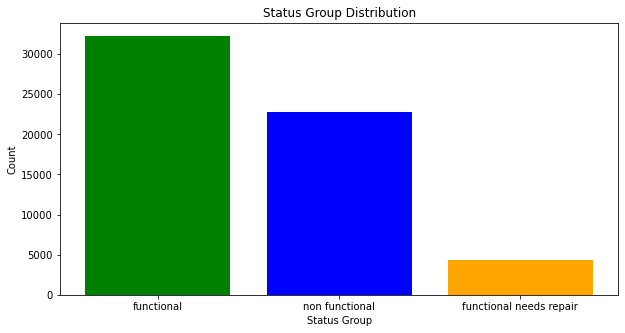

'Functional water pumps have the highest distribution followed closely by non_functional waterpumps'

In [63]:
# distribution of status groups
status_group_count = training_set_data.status_group.value_counts()
labels = list(status_group_count.index)
counts = list(status_group_count.tolist())

# plot
plt.figure(figsize=(10, 5)) 
plt.bar(labels, counts, color=['green', 'blue', 'orange']) 
plt.title('Status Group Distribution')
plt.xlabel('Status Group')
plt.ylabel('Count')


plt.show()

"""Functional water pumps have the highest distribution followed closely by non_functional waterpumps"""


<Figure size 720x360 with 0 Axes>

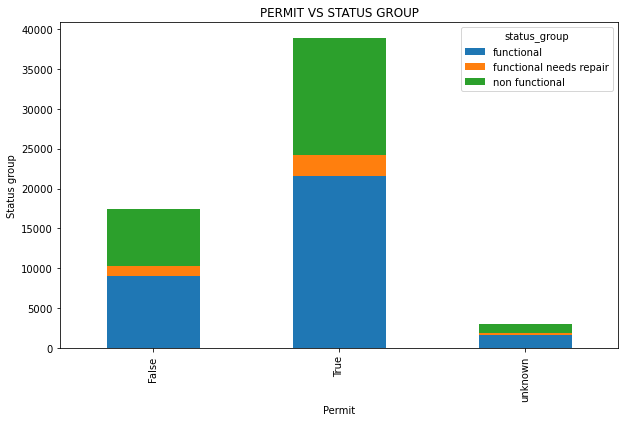

In [64]:
# distribution of status groups per permit

data = training_set_data.groupby(['permit', 'status_group']).size().unstack()

plt.figure(figsize= (10,5))
data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title ('PERMIT VS STATUS GROUP')
plt.xlabel('Permit')
plt.ylabel('Status group')
plt.show()

In [65]:
training_set_data.dtypes

id                   int64
status_group        object
amount_tsh         float64
date_recorded       object
funder              object
gps_height           int64
installer           object
longitude          float64
latitude           float64
basin               object
subvillage          object
region              object
region_code          int64
lga                 object
ward                object
population           int64
public_meeting      object
permit              object
extraction_type     object
management          object
payment             object
water_quality       object
quantity            object
source              object
waterpoint_type     object
dtype: object

## MODELLING

It is  worse for nonfunctional wells to be predicted as functional than for functional wells to be predicted to be nonfunctional. This is it would create an impression that alot of well are in a functional state subsequently leading to a scarcity in water

### Train split test

In [66]:
import  category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier


## Creating our baseline model 
Using random classifier. The random clasiffier assigns class labels without observing any patterns in the data

In [67]:
# encoding my categorical data

# Create a copy of the target variable
target_variable = training_set_data['status_group'].copy()

# Automatically identify and drop the target variable from categorical columns
categorical_columns = training_set_data.select_dtypes(include=['object']).drop(['status_group'], axis=1).columns

# Create a OneHotEncoder instance
encoder = ce.BinaryEncoder(cols=categorical_columns)

# Fit and transform the identified categorical columns
data_encoded = encoder.fit_transform(training_set_data[categorical_columns])

training_set_data.drop(columns=categorical_columns, inplace=True)
training_set_data = pd.concat([training_set_data, data_encoded], axis=1)


In [68]:
#split my data

from sklearn.model_selection import train_test_split

X = training_set_data.drop(['status_group'], axis=1)
y = training_set_data['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (47520, 112)
Number transactions y_train dataset:  (47520,)
Number transactions X_test dataset:  (11880, 112)
Number transactions y_test dataset:  (11880,)


In [69]:
# Create a StandardScaler instance and fit/transform on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [70]:
#Apply SMOTE to the training data only
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train_scaled, y_train)

In [71]:
# Create our baseline model
random_classifier = DummyClassifier(strategy= 'uniform')

#fit it
random_classifier.fit(X_train_resampled , y_train_resampled)

#make predictions on scaled features
y_random_predict = random_classifier.predict(X_test_scaled)

#evaluate the accuracy
accuracy = accuracy_score(y_test , y_random_predict)

print(f"The Random Classifier Accuracy is : { accuracy : .2f}")


The Random Classifier Accuracy is :  0.33


## FIRST MODEL

Using random forest classifier

In [72]:
#create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42 )

#fit the model
rf_classifier.fit (X_train_resampled , y_train_resampled)

#make predictions
y_predict = rf_classifier.predict(X_test_scaled)

#evaluate the accuracy
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))


[[5644  199  609]
 [ 425  298  140]
 [ 999   81 3485]]
                         precision    recall  f1-score   support

             functional       0.80      0.87      0.83      6452
functional needs repair       0.52      0.35      0.41       863
         non functional       0.82      0.76      0.79      4565

               accuracy                           0.79     11880
              macro avg       0.71      0.66      0.68     11880
           weighted avg       0.79      0.79      0.79     11880



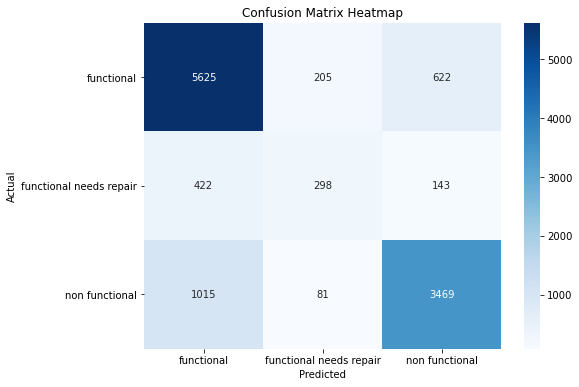

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Your confusion matrix
conf_matrix = [[5625, 205, 622],
               [422, 298, 143],
               [1015, 81, 3469]]

# Labels for the classes
class_labels = ['functional', 'functional needs repair', 'non functional']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

The first row represents instances that are in the functional class, the second row represents instances that are in the functtional needs repair class and the third row represents instances that are in the not functional class

#### Functional class
    The model correctly predicted 5625 instances as functional. It wrongly predicted 205 instances as functional needs repair when in real sense they were functional and also wrongly predicts 622 instances as non functional while they were actually functional

#### Functional needs repair
      The model correctly predicts 298 instances as functional needs repair. It wrongly predicted 422 instances as functional when in real sense they needed repair and also wrongly precicted 143 instances as not functional when they needed repair

#### Not functional
      The model correctly predicts 3469 instances  as not functional. However it wrongly predicted 1015 instances as functional when they were not functional and also wrongly predicted 81 instances as needs repair when they were not functional.

#### Precision
      It measures the proportion of all predictions that were correct.
      Theres an 80% accuracy for the functional wells predictions , a 51% precision for the functional but needs repair wells and a 0.82% precision for the not functional wells predictions

####  Recall
      Measures the proportion of actual positive cases that were correctly identified
      87% of positive instances in the functional status group were correctly predicted , 35% in the functional needs repair were predicted and 76% in the not functional status group were predicted

####  F_1score
       This is the harmonic mean of precision and recall 
       Functional had a score of 83% , functional needs repair had a score of 41% and non functional 79%

####  Support
      This is the number of instances in eeach of your class

Accuracy measures the overall correctness of the model's predictions. Our model has an accuracy of 79%

However the predictions in my functional needs repair class are performinng poorly. we shall make use of another model to see if there will be any improvments

Creatting predicted probabilities. This method gives you the probability estimates for each class in a multi-class classification problem. Model Evaluation: You can use predicted labels to evaluate the performance of your machine learning model to see whether my unsampled data works best.

##  SECOND MODEL
Using XGboost classification


In [74]:
xgb_classifier = XGBClassifier(random_state=42)

# Train model
xgb_classifier.fit(X_train_resampled , y_train_resampled)

# Make predictions
xgb_y_predict = xgb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, xgb_y_predict)

print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.2f}")
print(classification_report(y_test, xgb_y_predict))
print(confusion_matrix(y_test, xgb_y_predict))

XGBoost Classifier Accuracy: 0.79
                         precision    recall  f1-score   support

             functional       0.78      0.90      0.83      6452
functional needs repair       0.55      0.29      0.38       863
         non functional       0.84      0.73      0.78      4565

               accuracy                           0.79     11880
              macro avg       0.72      0.64      0.66     11880
           weighted avg       0.78      0.79      0.78     11880

[[5777  148  527]
 [ 507  251  105]
 [1167   60 3338]]


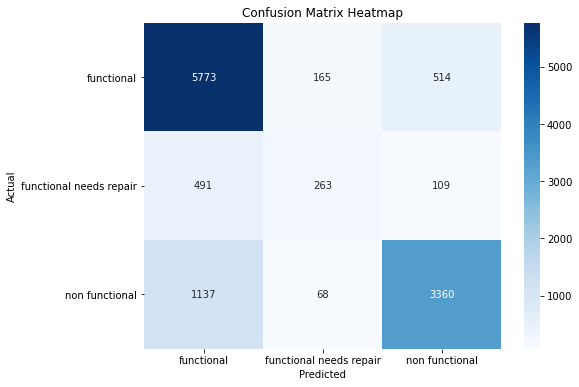

In [75]:
# Your confusion matrix
conf_matrix = [[5773 , 165 , 514],
                [ 491 , 263 , 109],
                [1137 ,  68 , 3360]]

# Labels for the classes
class_labels = ['functional', 'functional needs repair', 'non functional']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Both models have an accuracy score of 0.79, which is the same.

For the "Functional" class , the second model has a slightly better recall (0.89) than the first model's (0.87), a lower precision(0.78) compared to (0.80) and  the same f1_score as the first model's (0.83)

For the "Functional Needs Repair" class, the second model has a somewhat lower recall (0.30) compared to the first model (0.35) but a higher precision of (0.53) compared to (0.51). The f_1 score is also low at (0.39) compared to the first model's (0.41)

For the "Non-Functional" class, the initial model's precision (0.82) is somewhat lower in comparison to that of the second model's (0.84), and its recall (0.76) is marginally higher than that of the second model which is (0.74). The f_1 score is similar in both models.

Despite fixing class imbalances using SMOTE , the quantity of support for each class in the resampled data may still be affected because SMOTE creates sample instances using data that is already in existence. In this case, the functional needs repair class had significantly less instances compared to other classes.

Precision focuses on minimizing false positives, while recall focuses on minimizing false negatives therefore Improving precision may lead to a decrease in recall and vice versa as seen in our models above

In [76]:
print("Number of samples in X_train_scaled:", X_train_scaled.shape[0])
print("Number of samples in y_train_resampled:", len(y_train_resampled))

Number of samples in X_train_scaled: 47520
Number of samples in y_train_resampled: 77421


## MODEL 3
Using gradient Boost Classifier

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the scaled training data
gb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the scaled test set
gb_y_pred = gb_classifier.predict(X_test_scaled)

# Display a classification report and confusion matrix
print(classification_report(y_test, gb_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_y_pred))



                         precision    recall  f1-score   support

             functional       0.54      0.66      0.60      6457
functional needs repair       0.08      0.04      0.05       851
         non functional       0.38      0.30      0.33      4572

               accuracy                           0.48     11880
              macro avg       0.33      0.33      0.33     11880
           weighted avg       0.45      0.48      0.46     11880

Confusion Matrix:
[[4278  207 1972]
 [ 534   30  287]
 [3047  153 1372]]


## HYPERPARAMETER TUNING 
Using RandomForestClassifier

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=50)

# Define a parameter distribution for hyperparameter tuning
param_dist = {
    "max_depth": [3, None],
    "max_features": sp_randint(1, 11),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

samples = 8  # Number of random samples

# Create a RandomizedSearchCV object
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples, cv=3, n_jobs=-1)

# Fit the RandomizedSearchCV object to your training data
randomCV.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters found by the search
print("Best Hyperparameters:", randomCV.best_params_)

# Access the mean test scores from cross-validation
print("Mean Test Scores:", randomCV.cv_results_['mean_test_score'])

# Make predictions on the scaled test set using the best model
best_model = randomCV.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model's performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

# Display a classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Hyperparameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 5, 'min_samples_split': 8}
Mean Test Scores: [0.61777812 0.83261647 0.79555934 0.63158575 0.82580953 0.62281552
 0.61179783 0.62136888]
Accuracy on Test Set: 0.4655723905723906
                         precision    recall  f1-score   support

             functional       0.55      0.60      0.57      6457
functional needs repair       0.07      0.05      0.06       851
         non functional       0.38      0.35      0.37      4572

               accuracy                           0.47     11880
              macro avg       0.33      0.33      0.33     11880
           weighted avg       0.45      0.47      0.46     11880

Confusion Matrix:
[[3900  327 2230]
 [ 494   41  316]
 [2759  223 1590]]


The accuracy on the test set dropped significantly, and the precision, recall, and F1-score for all classes also decreased. This could be a result of suboptimal hyperparameters and potential overfitting.

USE RECURSIVE FEATURE ENGINEERING

In [87]:
from sklearn.feature_selection import RFE
# Split the data into training and testing sets 
X_train_scaled_resampled, X_test_scaled, y_train_resampled, y_test = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42
)
# Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Initialize the RFE with the classifier and the number of features to select
num_features_to_select = 10  
rfe = RFE(clf, n_features_to_select=num_features_to_select)

# Fit the RFE to the training data
rfe.fit(X_train_scaled_resampled, y_train_resampled)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Train the model on the selected features
clf.fit(X_train_scaled_resampled[selected_features], y_train_resampled)

# Make predictions on the test set using the selected features
y_pred = clf.predict(X_test_scaled[selected_features])

<ipython-input-87-640c350572b1>:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  clf.fit(X_train_scaled_resampled[selected_features], y_train_resampled)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Split the data into training and testing sets
X_train_scaled_resampled, X_test_scaled, y_train_resampled, y_test = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42
)

# Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Initialize the RFE with the classifier and the number of features to select
num_features_to_select = 10  
rfe = RFE(clf, n_features_to_select=num_features_to_select)

# Fit the RFE to the training data
rfe.fit(X_train_scaled_resampled, y_train_resampled)

# Get the selected features
selected_features = X_train_scaled_resampled.columns[rfe.support_]

# Train the model on the selected features
clf.fit(X_train_scaled_resampled[selected_features], y_train_resampled)

# Make predictions on the test set using the selected features
y_pred = clf.predict(X_test_scaled[selected_features])

In [90]:
X_train_scaled_resampled.dtype

dtype('float64')

In [91]:
train_test_data.describe()

NameError: name 'train_test_data' is not defined